# Title: Football Hackathon                   
<!--  -->                 
# Aim:         
**Predict the rating of a football player in a given match**   

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropDuplicateFeatures,DropConstantFeatures
from feature_engine.wrappers import SklearnTransformerWrapper


In [3]:
cd/users/prave/datasets/csv files/competition/football

C:\users\prave\datasets\csv files\competition\football


In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv('test.csv')

# Exploring dataset

In [5]:
print('There are {} rows and {} columns in train dataset'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test dataset'.format(test.shape[0],test.shape[1]))

There are 20453 rows and 800 columns in train dataset
There are 8774 rows and 799 columns in test dataset


In [6]:
train.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,7.0,winner,team1,8,7.0,7.0,0.317073,0.48,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,6.5,loser,team2,8,3.0,9.0,0.463415,0.42,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,8.5,loser,team1,5,11.0,11.0,0.682927,0.44,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,8.0,loser,team2,4,17.0,17.0,0.682927,0.58,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,3.5,draw,team1,5,10.0,10.0,0.731707,0.70,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


In [7]:
for i in train.columns.drop(['row_id']):
    print(i,train[i].unique())

scout_id [13 16  4 11 15  3  2 10 19  5 14  1 12 18 26 17 21 20 25 22  8]
rating_num [ 7.   6.5  8.5  8.   3.5  7.5 10.   6.   9.   2.   0.   3.   5. ]
winner ['winner' 'loser' 'draw']
team ['team1' 'team2']
competitionId [ 8  5  4  7  9 10  6 11 14 15]
player_position_1 [ 7.  3. 11. 17. 10.  8.  4.  1.  5. 15.  2. 12.  6. 16.  9. 19. 13. nan
 14. 18. 22. 23. 20.]
player_position_2 [ 7.  9. 11. 17. 10.  8.  3.  4.  1.  5. 15.  2. 12.  6. 16. 19. 13. nan
 14. 18. 22. 23. 20.]
player_height [0.31707317 0.46341463 0.68292683 0.73170732 0.6097561  0.24390244
 0.3902439  0.58536585 0.29268293 0.36585366 0.34146341 0.70731707
 0.65853659 0.48780488 0.41463415 0.14634146 0.56097561 0.82926829
 0.53658537 0.26829268 0.43902439 0.51219512 0.75609756 0.17073171
 0.19512195 0.63414634 0.80487805 0.7804878  0.2195122  0.02439024
 0.07317073 0.12195122 0.85365854 0.97560976 0.95121951 0.90243902
 0.09756098 0.87804878        nan 0.92682927]
player_weight [0.48 0.42 0.44 0.58 0.7  0.46 0.34 0.22 0.3

player_defensive_raw_var_67 [0.     0.0625 0.125  0.1875 0.375  0.3125 0.25   0.4375 0.5       nan
 0.5625 0.6875 0.625  0.8125 0.75   1.    ]
player_other_raw_var_68 [0.21052632 0.05263158 0.36842105 0.         0.13157895 0.15789474
 0.23684211 0.18421053 0.28947368 0.10526316 0.47368421 0.52631579
 0.76315789 0.31578947 0.26315789 0.02631579 0.07894737 0.39473684
 0.34210526 0.57894737 0.44736842 0.42105263 0.5        0.63157895
 0.68421053        nan 0.55263158 0.60526316 0.71052632 0.84210526
 0.65789474 0.73684211 0.81578947 0.78947368 0.89473684 0.86842105
 1.        ]
player_other_raw_var_69 [0.08 0.04 0.12 0.   0.2  0.16 0.36 0.24 0.4  0.32 0.44 0.28 0.6  0.48
 0.56  nan 0.52 0.64 0.72 0.68 0.8  0.76 0.88]
player_defensive_raw_var_70 [0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
        nan 0.5        0.58333333 0.66666667 0.75       0.83333333
 1.         0.91666667]
player_general_raw_var_71 [0.  0.5 nan 1. ]
player_general_raw_var_72 [0.         0.333333

player_defensive_raw_var_93 [0.07692308 0.         0.38461538 0.23076923 0.15384615 0.30769231
 0.46153846        nan 0.61538462 0.53846154 0.69230769 0.84615385
 1.        ]
player_defensive_raw_var_94 [0.07692308 0.         0.38461538 0.23076923 0.15384615 0.46153846
 0.53846154 0.61538462 0.30769231        nan 0.69230769 0.92307692
 0.84615385 0.76923077 1.        ]
player_defensive_raw_var_95 [0.         0.42857143 0.14285714 0.57142857 0.28571429        nan
 1.         0.85714286 0.71428571]
player_other_raw_var_96 [0.  nan 0.5 1. ]
player_defensive_raw_var_97 [0.         0.16666667 0.33333333        nan 0.5        0.66666667
 0.83333333]
player_other_raw_var_98 [0.  0.2 nan 0.4 0.6 0.8]
player_other_raw_var_99 [0.  nan 0.5 1. ]
player_defensive_raw_var_100 [0.    0.25  0.125   nan 0.375 0.625 0.5   0.75  0.875 1.   ]
player_other_raw_var_101 [0.         0.15384615 0.07692308 0.23076923 0.38461538        nan
 0.30769231 0.46153846 0.61538462 0.69230769 0.53846154 0.84615385]
playe

player_physical_raw_var_191 [0.38809723 0.26431964 0.42553786 ... 0.67253423 0.73595977 0.57166806]
player_physical_raw_var_192 [0.37001595 0.20255183 0.46570973        nan 0.43301435 0.32057416
 0.72488038 0.28548644 0.44098884 0.70494418 0.50717703 0.43859649
 0.42025518 0.67464115 0.46730463 0.3708134  0.1953748  0.66985646
 0.28947368 0.24242424 0.476874   0.39553429 0.65470494 0.11164274
 0.261563   0.67942584 0.62360447 0.50398724 0.41547049 0.46650718
 0.61562998 0.31419458 0.56937799 0.23205742 0.37480064 0.62599681
 0.7185008  0.40749601 0.3676236  0.46172249 0.43779904 0.72807018
 0.56698565 0.42105263 0.33094099 0.60207337 0.20574163 0.29186603
 0.22408293 0.31738437 0.31658692 0.49760766 0.61961722 0.27033493
 0.53907496 0.58931419 0.28628389 0.65709729 0.42264753 0.24800638
 0.39154705 0.33492823 0.55821372 0.57894737 0.41467305 0.55901116
 0.42583732 0.3046252  0.40430622 0.49122807 0.74481659 0.40590112
 0.38676236 0.24322169 0.5661882  0.74322169 0.52073365 0.41148325
 

player_other_raw_var_197 [0.76315789 0.35526316 0.53289474        nan 0.59210526 0.61842105
 0.53947368 0.23684211 0.60526316 0.70394737 0.63157895 0.69078947
 0.30921053 0.64473684 0.625      0.67105263 0.43421053 0.52631579
 0.38157895 0.78289474 0.34868421 0.58552632 0.82894737 0.44078947
 0.47368421 0.66447368 0.77631579 0.48026316 0.50657895 0.51973684
 0.75657895 0.80921053 0.73684211 0.57236842 0.49342105 0.26973684
 0.32236842 0.41447368 0.55263158 0.61184211 0.51315789 0.59868421
 0.5        0.63815789 0.42105263 0.65789474 0.71710526 0.40789474
 0.76973684 0.45394737 0.81578947 0.39473684 0.36842105 0.84868421
 0.46710526 0.79605263 0.55921053 0.34210526 0.57894737 0.78947368
 0.72368421 0.48684211 0.56578947 0.67763158 0.75       0.65131579
 0.375      0.73026316 0.54605263 0.68421053 0.42763158 0.46052632
 0.69736842 0.71052632 0.40131579 0.27631579 0.31578947 0.44736842
 0.25657895 0.21710526 0.29605263 0.38815789 0.85526316 0.86184211
 0.28289474 0.33552632 0.82236842 0.7

player_positional_ratio_var_46 [0.045 0.625 0.4     nan 0.286 1.    0.459 0.056 0.25  0.5   0.    0.6
 0.071 0.125 0.586 0.471 0.476 0.571 0.036 0.667 0.375 0.435 0.222 0.167
 0.583 0.304 0.143 0.75  0.615 0.8   0.556 0.368 0.241 0.19  0.522 0.429
 0.067 0.458 0.444 0.417 0.2   0.133 0.229 0.438 0.364 0.474 0.3   0.519
 0.184 0.091 0.679 0.833 0.273 0.353 0.278 0.1   0.208 0.313 0.333 0.238
 0.636 0.414 0.462 0.083 0.478 0.579 0.308 0.182 0.118 0.773 0.467 0.652
 0.514 0.385 0.44  0.111 0.12  0.192 0.714 0.114 0.676 0.214 0.174 0.077
 0.294 0.235 0.129 0.306 0.846 0.72  0.533 0.447 0.452 0.053 0.588 0.52
 0.48  0.65  0.767 0.531 0.545 0.563 0.538 0.042 0.188 0.576 0.647 0.357
 0.107 0.348 0.917 0.158 0.455 0.769 0.412 0.267 0.391 0.611 0.818 0.526
 0.41  0.105 0.875 0.529 0.231 0.226 0.407 0.469 0.344 0.389 0.355 0.684
 0.194 0.346 0.778 0.316 0.289 0.517 0.619 0.786 0.593 0.387 0.542 0.696
 0.813 0.857 0.296 0.867 0.359 0.7   0.154 0.552 0.043 0.115 0.9   0.28
 0.318 0.261 0.35  0.059

player_offensive_ratio_var_50 [0.878 0.667 0.65  1.    0.857 0.905 0.864 0.762 0.73  0.971 0.956 0.429
 0.8   0.926 0.923 0.848 0.818 0.55  0.942 0.938 0.769 0.692 0.792 0.867
 0.5   0.783 0.759 0.95  0.879 0.583 0.756 0.909 0.789 0.939 0.895 0.6
 0.854 0.804 0.7   0.912 0.865 0.875 0.722 0.765 0.872 0.958 0.806 0.843
 0.75  0.706 0.805 0.862 0.731 0.725 0.78  0.929 0.828 0.9   0.727 0.556
 0.973 0.609 0.742 0.739 0.947 0.625 0.894 0.933 0.688 0.833 0.943 0.714
 0.656 0.821 0.853 0.808 0.839 0.85  0.913 0.978 0.813 0.767 0.917 0.737
 0.969 0.965 0.932 0.611 0.961 0.984 0.81  0.957 0.925 0.881 0.636 0.786
 0.914 0.882 0.796   nan 0.758 0.781 0.72  0.94  0.885 0.741 0.92  0.979
 0.844 0.934 0.962 0.955 0.918 0.868 0.846 0.793 0.902 0.88  0.842 0.919
 0.98  0.951 0.904 0.778 0.697 0.935 0.974 0.826 0.972 0.968 0.889 0.824
 0.593 0.182 0.898 0.96  0.724 0.946 0.788 0.708 0.571 0.963 0.952 0.696
 0.773 0.84  0.682 0.922 0.733 0.911 0.647 0.977 0.903 0.893 0.586 0.684
 0.981 0.886 0.871 0.86

player_physical_derived_var_4 [0.57272762 0.23965205 0.61014427 ... 0.38214682 0.45254678 0.4671825 ]
player_physical_derived_var_5 [0.39198687 0.16692236 0.47286267 ... 0.31288927 0.35354138 0.37898877]
player_physical_derived_var_6 [0.53777515 0.25548228 0.57949359 ... 0.54760365 0.33949091 0.47118507]
player_defensive_derived_var_7 [0.25518271 0.32091983 0.43592217 ... 0.25723569 0.3980659  0.32167249]
player_defensive_derived_var_8 [0.         0.15264665 0.15354733 ... 0.15991094 0.14364489 0.27469257]
player_physical_derived_var_9 [0.68935814 0.36065207 0.76573586 ... 0.52075429 0.68309383 0.45994288]
player_physical_derived_var_10 [0.19813032 0.04400485 0.22482602 ... 0.09444409 0.29639253 0.05771969]
player_defensive_derived_var_11 [0.         0.00314825 0.01794547 ... 0.0052674  0.00414911 0.00672338]
player_defensive_derived_var_12 [0.         0.10263991 0.05837872 0.046387   0.05492682 0.07007679
 0.07160109 0.06084848 0.07191738 0.05845353 0.05271896 0.05348394
 0.01955925 0

player_positional_derived_var_14 [0.         0.02649709 0.03210696 ... 0.03577058 0.02677595 0.10288419]
player_positional_derived_var_15 [0.         0.00185476 0.00167064 ... 0.00663986 0.0116485  0.01538566]
player_physical_derived_var_16 [0.46499274 0.21201378 0.5182904  ... 0.33894231 0.498378   0.33297802]
player_offensive_derived_var_17 [0.00398342 0.00060915 0.01557174 ... 0.07809028 0.01675767 0.00457044]
player_physical_derived_var_18 [0.34953447 0.17233861 0.42812739 ... 0.34397334 0.36629939 0.2977687 ]
player_defensive_derived_var_19 [0.00584868 0.00723594 0.         ... 0.0683087  0.01914197 0.02128913]
player_other_derived_var_20 [0.50850295 0.18131932 0.43420191 ... 0.1996997  0.36712483 0.34715932]
player_offensive_derived_var_21 [0.1758273  0.0900514  0.0297518  ... 0.00665667 0.02151222 0.10171447]
player_positional_derived_var_22 [0.         0.01417933 0.02504829 ... 0.01611224 0.00648679 0.00994295]
player_physical_derived_var_23 [0.20559674 0.08771387 0.25247963 ..

player_offensive_derived_var_63 [0.02758218 0.         0.02342756 ... 0.01516066 0.0309251  0.05565594]
player_positional_derived_var_64 [0.19742797 0.05038496 0.04828736 ... 0.03498235 0.12916779 0.08179151]
player_defensive_derived_var_65 [0.         0.02361533 0.06624118 ... 0.01059563 0.03749818 0.01835915]
player_defensive_derived_var_66 [0.29336787 0.29707697 0.34001364 ... 0.30541666 0.32643447 0.29674115]
player_defensive_derived_var_67 [0.         0.05306114 0.05348678 ... 0.25792728 0.05426688 0.17411161]
player_offensive_derived_var_68 [0.03966025 0.25244225 0.05118158 ... 0.03554741 0.11033998 0.11200436]
player_physical_derived_var_69 [0.57272762 0.23965205 0.61014427 ... 0.38214682 0.45254678 0.4671825 ]
player_physical_derived_var_70 [0.39198687 0.16692236 0.47286267 ... 0.31288927 0.35354138 0.37898877]
player_physical_derived_var_71 [0.53777515 0.25548228 0.57949359 ... 0.54760365 0.33949091 0.47118507]
player_defensive_derived_var_72 [0.46816073 0.48534129 0.47140995 

player_offensive_derived_var_110 [0.02804571 0.         0.01363106 ... 0.01350858 0.00866997 0.01859947]
player_physical_derived_var_111 [0.68935814 0.36065207 0.76573586 ... 0.52075429 0.68309383 0.45994288]
player_physical_derived_var_112 [0.19813032 0.04400485 0.22482602 ... 0.09444409 0.29639253 0.05771969]
player_defensive_derived_var_113 [0.         0.00314825 0.01794547 ... 0.0052674  0.00414911 0.00672338]
player_defensive_derived_var_114 [0.         0.10263991 0.05837872 0.046387   0.05492682 0.07007679
 0.07160109 0.06084848 0.07191738 0.05845353 0.05271896 0.05348394
 0.01955925 0.03082186        nan 0.0228698  0.07056258 0.03042793
 0.01574218 0.18707705 0.02518781 0.0190995  0.0758475  0.07722901
 0.04233149 0.13448792 0.06342212 0.07025944 0.06917675 0.08372013
 0.05536102 0.11283046 0.01889699 0.18817363 0.07306101 0.05328712
 0.08200324 0.05676592 0.06375268 0.03378475 0.04024181 0.05811918
 0.01574045 0.01927956 0.20574753 0.26353533 0.02353689 0.07544477
 0.06558617 0

player_defensive_derived_var_122 [0.00584868 0.00723594 0.         ... 0.0683087  0.01914197 0.02128913]
player_other_derived_var_123 [0.50850295 0.18131932 0.43420191 ... 0.1996997  0.36712483 0.34715932]
player_offensive_derived_var_124 [0.1758273  0.0900514  0.0297518  ... 0.00665667 0.02151222 0.10171447]
player_positional_derived_var_125 [0.         0.01863787 0.0329807  ... 0.02109833 0.00847949 0.01309173]
player_physical_derived_var_126 [0.20559674 0.08771387 0.25247963 ... 0.39116647 0.07932596 0.23999036]
player_offensive_derived_var_127 [0.35014491 0.07074434 0.18508595 ... 0.0612807  0.10592335 0.21384941]
player_offensive_derived_var_128 [0.43469112 0.16569711 0.3121873  ... 0.08035964 0.24832934 0.21047587]
player_offensive_derived_var_129 [0.10821563 0.         0.20184283 ... 0.16159498 0.10918646 0.12300762]
player_positional_derived_var_130 [0.11647665 0.02690146 0.02540267 ... 0.07241179 0.04176821 0.09241794]
player_physical_derived_var_131 [0.76632996 0.36070219 0.7

player_offensive_derived_var_158 [0.         0.61847276 0.66055287 0.53094163 0.26466935 0.84020506
 0.57275062 0.73554255 0.63459154 0.50303526 0.68293438 0.24863338
 0.36742336 0.56617995        nan 0.53547925 0.58511102 0.27809504
 0.30007982 0.65105522 0.41501386 0.55852467 0.49333444 0.70099042
 0.72267613 0.8911276  0.61658608 0.27178632 0.24627363 0.56674766
 0.15003991 0.57711096 0.59525223 0.61766381 0.29394288 0.60012102
 0.57298063 0.31839294 0.64621303 0.68680146 0.30971536 0.70021707
 0.56340895 0.56194507 0.6719647  0.62395194 0.68652543 0.74897899
 0.40026489 0.58958728 0.59663766 0.60582436 0.61225165 0.54297404
 0.60999752 0.67066385 0.62634391 0.5525386  0.56925591 0.67206956
 0.71287137 0.85718844 0.58877986 0.35543687 0.5797327  0.65315662
 0.70039073 0.70016726 0.28955149 0.77306692 0.72562361 0.6479154
 0.61660841 0.30389553 0.34623889 0.80705962 0.33658398 0.65412359
 0.75434668 0.59801606 0.27857139 0.39628069 0.32014513 0.73321033
 0.57294774 0.4059783  0.60357

team1_other_raw_var_20 [0.36 0.38 0.28 0.2   nan 0.34 0.3  0.26 0.68 0.48 0.22 0.6  0.42 0.32
 0.58 0.24 0.16 0.4  0.82 0.52 0.14 0.12 0.04 0.46 0.08 0.18 0.44 0.5
 0.06 0.1  0.66 0.54 0.64 0.7  0.02 0.62 0.9  0.72 0.56 0.78 0.84 0.88
 0.8  0.74 0.76 0.   0.96 1.  ]
team1_other_raw_var_21 [0.32075472 0.41194969 0.36792453 0.38679245 0.34591195        nan
 0.44968553 0.46226415 0.64779874 0.40566038 0.29559748 0.64465409
 0.32704403 0.22955975 0.26415094 0.30503145 0.3081761  0.32389937
 1.         0.48742138 0.39308176 0.25786164 0.59433962 0.50943396
 0.29874214 0.46540881 0.3427673  0.24842767 0.17295597 0.45597484
 0.20440252 0.33647799 0.52515723 0.22012579 0.37421384 0.3490566
 0.3836478  0.40880503 0.30188679 0.44025157 0.23584906 0.51886792
 0.35220126 0.67924528 0.08805031 0.39937107 0.33333333 0.1918239
 0.20125786 0.23899371 0.37106918 0.29245283 0.50314465 0.43710692
 0.07861635 0.48427673 0.25471698 0.39622642 0.22641509 0.27044025
 0.36477987 0.09119497 0.55660377 0.544025

team1_other_raw_var_55 [0.27439024 0.17682927 0.08536585 0.22764228 0.24390244        nan
 0.20528455 0.28455285 0.22560976 0.2195122  0.46138211 0.13821138
 0.18089431 0.49186992 0.41666667 0.39430894 0.47764228 0.36178862
 0.13617886 0.16260163 0.24593496 0.3495935  0.12195122 0.28861789
 0.2703252  0.29674797 0.53252033 0.25203252 0.51219512 0.19308943
 0.31707317 0.32113821 0.38617886 0.24796748 0.35569106 0.23780488
 0.2296748  0.28252033 0.2398374  0.19918699 0.43699187 0.32926829
 0.26422764 0.09756098 0.12804878 0.45934959 0.3800813  0.20325203
 0.34756098 0.52235772 0.29878049 0.38414634 0.24186992 0.0995935
 0.25406504 0.46544715 0.45325203 0.26829268 0.42886179 0.20731707
 0.30284553 0.37398374 0.17886179 0.08739837 0.44308943 0.39837398
 0.43495935 0.21138211 0.4695122  0.22154472 0.4004065  0.33739837
 0.39634146 0.43089431 0.12601626 0.43292683 0.30894309 0.41463415
 0.05487805 0.23373984 0.26219512 0.39227642 0.23577236 0.37195122
 0.27845528 0.10365854 0.57926829 0.6077

team1_defensive_raw_var_68 [0.         0.33333333 0.11111111        nan 0.22222222 0.44444444
 0.55555556 0.88888889 0.66666667 0.77777778]
team1_other_raw_var_69 [0.61585366 0.55487805 0.4695122  0.58536585 0.45121951        nan
 0.52439024 0.68902439 0.62195122 0.45731707 0.69512195 0.62804878
 0.54268293 0.60365854 0.6097561  0.56097561 0.68292683 0.70731707
 0.50609756 0.48170732 0.56707317 0.51829268 0.57926829 0.46341463
 0.67073171 0.5        0.48780488 0.49390244 0.57317073 0.59146341
 0.64634146 0.66463415 0.5304878  0.63414634 0.59756098 0.54878049
 0.43902439 0.53658537 0.65853659 0.47560976 0.51219512 0.67682927
 0.81097561 0.6402439  0.75609756 0.72560976 0.70121951 0.71341463
 0.7195122  0.44512195 0.65243902 0.40243902 0.38414634 0.39634146
 0.86585366 0.34756098 0.80487805 0.73780488 0.74390244 0.7804878
 0.82317073 0.42073171 0.04268293 0.3902439  0.75       0.73170732
 0.41463415 0.43292683 0.3597561  0.76829268 0.84756098 0.76219512
 1.         0.40853659 0.42682927 

team1_offensive_ratio_var_6 [0.545 0.633 0.737 0.667   nan 0.708 0.6   0.765 0.81  0.686 0.733 0.909
 0.556 0.591 0.618 0.65  0.808 0.538 0.769 0.842 0.806 0.571 0.8   0.704
 0.611 0.522 0.615 0.655 0.533 0.654 0.647 0.692 0.833 0.828 0.891 0.69
 0.625 0.621 0.867 0.75  0.607 0.48  0.773 0.412 0.684 0.609 0.222 0.526
 0.698 0.719 0.421 0.583 0.818 0.722 0.565 0.677 0.286 0.5   0.7   0.68
 0.375 0.63  0.524 0.4   0.727 0.643 0.762 0.588 0.788 0.462 0.467 0.308
 0.786 0.548 0.641 0.3   0.438 0.71  0.55  0.688 0.25  0.357 0.774 0.636
 0.476 0.436 0.846 0.72  0.652 0.789 0.458 0.316 0.294 0.263 0.417 0.679
 0.696 0.2   0.385 0.435 0.15  0.778 0.579 0.594 0.581 0.682 0.577 0.478
 0.714 0.821 0.444 0.66  0.563 0.606 0.844 0.474 0.389 0.471 0.423 0.941
 0.37  0.657 0.706 0.333 0.564 0.455 0.61  0.586 0.744 0.711 0.32  0.313
 0.76  0.85  0.619 0.318 0.761 0.857 0.091 0.792 0.649 0.542 0.721 0.741
 0.794 0.906 0.429 0.296 0.176 0.793 0.742 0.64  0.882 0.52  0.732 0.676
 0.28  0.605 0.536 0.35  

team1_other_ratio_var_18 [0.33252427 0.47330097 0.1723301  0.31796117 0.52184466        nan
 0.5315534  0.47815534 0.47572816 0.2961165  0.21116505 0.8131068
 0.28883495 0.31553398 0.51699029 0.56553398 0.48543689 0.58495146
 0.33495146 0.44902913 0.54368932 0.68932039 0.3907767  0.50485437
 0.67718447 0.50242718 0.8276699  0.36893204 0.55339806 0.80582524
 0.41504854 0.74514563 0.46116505 0.62621359 0.42718447 0.37378641
 0.51456311 0.20631068 0.46601942 0.4538835  0.53883495 0.58252427
 0.6092233  0.65533981 0.59466019 0.61407767 0.69417476 0.37864078
 0.36165049 0.66019417 0.64805825 0.51941748 0.6723301  0.67475728
 0.65776699 0.51213592 0.7184466  0.44174757 0.35679612 0.66262136
 0.61650485 0.49757282 0.61893204 0.62378641 0.50728155 0.63834951
 0.57038835 0.48786408 0.41990291 0.71116505 0.3592233  0.74757282
 0.60436893 0.49271845 0.6868932  0.79854369 0.41747573 0.49514563
 0.33980583 0.49029126 0.64563107 0.61165049 0.44660194 0.22815534
 0.71601942 0.58009709 0.38592233 0.59

 0.50955414 0.70063694]
team1_other_ratio_var_38 [0.56       0.48761905 0.48952381 0.65333333 0.40380952        nan
 0.50666667 0.6152381  0.45714286 0.42666667 0.5447619  0.54857143
 0.63809524 0.57333333 0.49904762 0.76952381 0.31619048 0.6552381
 0.44571429 0.35809524 0.62095238 0.54285714 0.60952381 0.64761905
 0.49142857 0.32190476 0.52571429 0.55619048 0.30666667 0.69904762
 0.61333333 0.27809524 0.58095238 0.52       0.50857143 0.45904762
 0.30095238 0.46666667 0.36       0.78095238 0.64571429 0.45142857
 0.38285714 0.37714286 0.41142857 0.42857143 0.41904762 0.54095238
 0.52380952 0.4152381  0.57714286 0.72761905 0.78285714 0.43047619
 0.37333333 0.48380952 0.3352381  0.32       0.47238095 0.67428571
 0.59428571 0.62285714 0.48190476 0.38857143 0.5847619  0.74285714
 0.37142857 0.51809524 0.55809524 0.24380952 0.76380952 0.61904762
 0.2152381  0.36571429 0.60571429 0.39238095 0.16       0.69142857
 0.42095238 0.48       0.45333333 0.42285714 0.3847619  0.56952381
 0.55428571 0.

team1_offensive_derived_var_0 [0.29510555 0.5803149  0.16354795 ... 0.19434825 0.54792194 0.12946781]
team1_defensive_derived_var_1 [0.         0.22283658 0.09168198        nan 0.18608753 0.27846826
 0.0773965  0.08125234 0.3667279  0.17854367 0.25878489 0.19847537
 0.08894593 0.09773287 0.30214502 0.16819015 0.30944872 0.08994491
 0.18336395 0.09923768 0.16237615 0.20856673 0.24671961 0.07367646
 0.16447974 0.26789903 0.22102938 0.1749416  0.1856455  0.07427886
 0.14855772 0.09304377 0.07347854 0.17107072 0.08889791 0.10428337
 0.15540867 0.1032008  0.1794231  0.10071501 0.08086053 0.0874708
 0.07770433 0.26983472 0.29105913 0.16398509 0.26913465 0.32797017
 0.20640159 0.17739466 0.08626163 0.24258159 0.07843676 0.09282275
 0.24597763 0.41280319 0.32344212 0.266092   0.154793   0.08199254
 0.2931986  0.20124765 0.08553536 0.08332564 0.10062383 0.08118807
 0.14735292 0.08971155 0.08929968 0.08927183 0.309586   0.37129101
 0.35427606 0.08587525 0.15472436 0.35478933 0.07628781 0.4276767

team2_defensive_raw_var_24 [0.42296073 0.58006042 0.05438066 0.46223565 0.1858006  0.09365559
 0.26283988 0.06646526 0.10876133 0.29607251 0.17975831 0.3776435
        nan 0.1918429  0.10574018 0.70996979 0.37009063 0.22205438
 0.12839879 0.3081571  0.07401813 0.17220544 0.31873112 0.21752266
 0.18882175 0.04229607 0.14803625 0.08459215 0.26888218 0.21601208
 0.42749245 0.21148036 0.26586103 0.22356495 0.20845921 0.07250755
 0.22809668 0.26435045 0.32779456 0.33081571 0.0755287  0.38821752
 0.64803625 0.19939577 0.23716012 0.12537764 0.30966767 0.15407855
 0.15861027 0.418429   0.34592145 0.05287009 0.39274924 0.07854985
 0.12688822 0.32628399 0.28549849 0.20996979 0.09818731 0.32024169
 0.11782477 0.13293051 0.3897281  0.21903323 0.35045317 0.24471299
 0.16465257 0.28398792 0.40030211 0.11329305 0.27794562 0.28096677
 0.46827795 0.33685801 0.1570997  0.16314199 0.15558912 0.1102719
 0.39123867 0.13746224 0.35196375 0.31722054 0.29909366 0.55589124
 0.20090634 0.12990937 0.33232628 0.0

team2_other_raw_var_48 [0.30088496 0.3539823  0.40707965 0.33628319 0.56637168 0.36283186
 0.2300885  0.44247788 0.39380531 0.21681416 0.21238938        nan
 0.35840708 0.15486726 0.15044248 0.39823009 0.28318584 0.37168142
 0.47345133 0.25663717 0.41150442 0.27433628 0.47787611 0.34070796
 0.2699115  0.26548673 0.22123894 0.28761062 0.58849558 0.30530973
 0.34513274 0.31415929 0.32300885 0.19911504 0.25221239 0.61946903
 0.15929204 0.2079646  0.64159292 0.37610619 0.45132743 0.19469027
 0.23451327 0.33185841 0.52654867 0.30973451 0.24336283 0.2920354
 0.16814159 0.78318584 0.44690265 0.32743363 0.20353982 0.22566372
 0.48672566 0.31858407 0.18141593 0.51327434 0.36725664 0.26106195
 0.5619469  0.24778761 0.7699115  0.38495575 0.50884956 0.29646018
 0.67256637 0.34955752 0.46902655 0.40265487 0.38053097 0.5840708
 0.57522124 0.62831858 0.4380531  0.38938053 0.53539823 0.49115044
 0.48230088 0.42920354 0.45575221 0.27876106 0.46460177 0.19026549
 0.16371681 0.42477876 0.46017699 0.5    

team2_other_raw_var_87 [0.         0.25       0.33333333 0.08333333 0.41666667 0.16666667
 0.83333333        nan 0.5        0.58333333 0.66666667 0.75      ]
team2_other_raw_var_88 [0.1875 0.125  0.0625 0.     0.625  0.25   0.3125 0.4375    nan 0.8125
 0.5    0.375  0.5625 0.75   0.6875 0.875  0.9375]
team2_other_raw_var_89 [0.1 0.2 0.  0.3 nan 0.5 0.4 0.7 0.6 1.  0.8]
team2_other_raw_var_90 [0.37349398 0.37951807 0.26506024 0.41566265 0.1746988  0.55421687
 0.47590361 0.30722892 0.29518072 0.39759036 0.56024096        nan
 0.3373494  0.25903614 0.44578313 0.51807229 0.3313253  0.3253012
 0.46987952 0.24096386 0.58433735 0.36746988 0.28313253 0.43373494
 0.5        0.15060241 0.48192771 0.23493976 0.24698795 0.42771084
 0.42168675 0.39156627 0.30120482 0.45180723 0.36144578 0.52409639
 0.54819277 0.25301205 0.40361446 0.59036145 0.22289157 0.48795181
 0.51204819 0.43975904 0.45783133 0.34939759 0.28915663 0.35542169
 0.46385542 0.15662651 0.31325301 0.34337349 0.19879518 0.18072289
 0.

team2_offensive_ratio_var_9 [0.1   0.25  0.192 0.176 0.121 0.321 0.    0.045 0.188 0.455 0.304 0.059
   nan 0.421 0.4   0.167 0.143 0.286 0.333 0.348 0.273 0.296 0.278 0.385
 0.174 0.154 0.091 0.231 0.208 0.211 0.158 0.067 0.324 0.083 0.207 0.28
 0.294 0.292 0.6   0.053 0.2   0.133 0.227 0.15  0.235 0.313 0.107 0.238
 0.05  0.3   0.077 0.182 0.357 0.04  0.24  0.087 0.063 0.172 0.318 0.263
 0.261 0.259 0.308 0.125 0.103 0.412 0.129 0.556 0.056 0.217 0.162 0.185
 0.467 0.111 0.115 0.088 0.097 0.5   0.138 0.175 0.095 0.267 0.222 0.391
 0.269 0.118 0.108 0.205 0.375 0.037 0.179 0.571 0.438 0.071 0.214 0.19
 0.429 0.148 0.364 0.417 0.353 0.389 0.105 0.474 0.136 0.314 0.156 0.16
 0.069 0.219 0.27  0.241 0.268 0.448 0.233 0.316 0.8   0.355 0.146 0.36
 0.282 0.538 0.13  0.048 0.139 0.12  0.08  0.444 0.027 0.038 0.043 0.306
 0.32  0.615 0.212 0.45  0.042 0.033 0.583 0.14  0.281 0.159 0.171 0.114
 0.462 0.31  0.393 0.237 0.471 0.35  0.229 0.276 0.476 0.368 0.381 0.533
 0.625 0.152 0.194 0.189 0.

team2_other_ratio_var_36 [0.30291262 0.33009709 0.49514563 0.34174757 0.64660194 0.5631068
 0.17087379 0.46796117 0.34563107 0.19417476 0.39805825 0.23106796
        nan 0.29902913 0.24271845 0.11650485 0.14951456 0.52621359
 0.68349515 0.45242718 0.29126214 0.38834951 0.69126214 0.33980583
 0.59805825 0.59029126 0.25825243 0.29708738 0.3961165  0.17281553
 0.59417476 0.58252427 0.5592233  0.38058252 0.54951456 0.57864078
 0.20194175 0.43106796 0.37669903 0.49320388 0.55533981 0.44660194
 0.42330097 0.26407767 0.41359223 0.72038835 0.50873786 0.33592233
 0.66601942 0.41941748 0.28932039 0.5184466  0.52038835 0.17669903
 0.60776699 0.31650485 0.72815534 0.46990291 0.54368932 0.33203883
 0.60194175 0.40194175 0.18252427 0.31262136 0.22718447 0.32815534
 0.97087379 0.44271845 0.32427184 0.36116505 0.62718447 0.34951456
 0.3592233  0.47572816 0.21941748 0.23495146 0.53398058 0.1961165
 0.34757282 0.41553398 0.54174757 0.53592233 0.48543689 0.2815534
 0.41165049 0.4038835  0.4        0.5398

team2_other_ratio_var_45 [0.    0.5   0.571 0.2   0.6   0.714 0.077 0.4   0.25  0.769 0.273 0.111
   nan 0.222 0.364 0.385 0.545 0.167 0.417 0.333 0.375 0.636 0.286 0.75
 0.444 0.3   1.    0.1   0.8   0.667 0.214 0.429 0.143 0.125 0.625 0.455
 0.833 0.083 0.182 0.067 0.857 0.462 0.875 0.231 0.308 0.727 0.063 0.556
 0.583 0.412 0.643 0.154 0.091 0.538 0.357 0.778 0.7   0.438 0.467 0.533
 0.235 0.071 0.267 0.188 0.158 0.889 0.313 0.176 0.278 0.105]
team2_other_ratio_var_46 [0.75  0.333 0.143 0.6   0.    0.769 0.5   0.077 0.455 0.778   nan 0.4
 0.8   1.    0.556 0.636 0.231 0.273 0.722 0.25  0.667 0.222 0.375 0.833
 0.2   0.889 0.364 0.167 0.429 0.444 0.7   0.571 0.714 0.286 0.545 0.3
 0.125 0.625 0.417 0.727 0.083 0.867 0.182 0.357 0.385 0.875 0.857 0.462
 0.091 0.813 0.111 0.692 0.9   0.471 0.538 0.615 0.818 0.583 0.909 0.313
 0.308 0.1   0.133 0.933 0.846 0.467 0.267 0.786 0.733 0.789 0.533 0.688
 0.643 0.188 0.917 0.154 0.563 0.235 0.929 0.923 0.529 0.278 0.579]
team2_other_ratio_var_

In [8]:
train.isna().sum().sort_values(ascending=False)

team2_other_raw_var_19    20453
team1_other_raw_var_50    20453
team1_other_raw_var_72    20453
team1_other_raw_var_19    20453
team1_other_raw_var_31    20453
                          ...  
player_general_var_2          0
player_general_var_3          0
player_general_var_5          0
scout_id                      0
row_id                        0
Length: 800, dtype: int64

In [9]:
test.isna().sum().sort_values(ascending=False)

team2_other_ratio_var_32    8774
team2_other_raw_var_51      8774
team1_other_ratio_var_32    8774
team2_other_raw_var_40      8774
team2_other_raw_var_43      8774
                            ... 
player_general_var_2           0
player_general_var_3           0
player_general_var_5           0
scout_id                       0
row_id                         0
Length: 799, dtype: int64

# Exploratory Data Analysis(EDA)

In [10]:
train['test_data']=0
test['test_data']=1
test['rating_num']=np.nan

df=pd.concat([train,test])

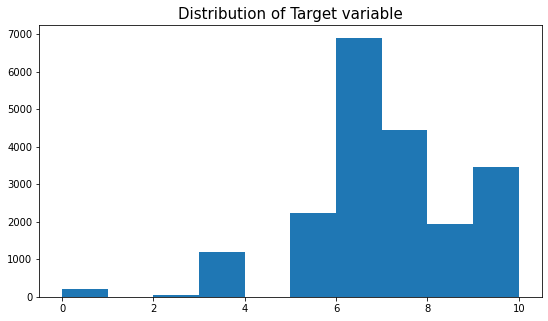

In [11]:
plt.figure(figsize=(9,5))
plt.hist(train['rating_num'])
plt.title("Distribution of Target variable",fontsize=15)
plt.show()

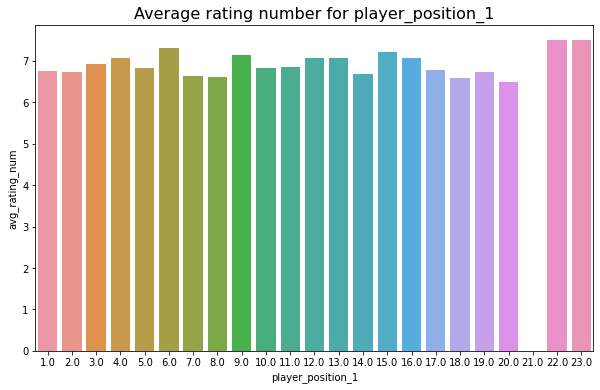

In [12]:
# Average rating number for player_position_1     
player_1=df.groupby('player_position_1',as_index=False)['rating_num'].mean().sort_values(by='player_position_1',ascending=False)
player_1.rename(columns={'rating_num':'avg_rating_num'},inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='player_position_1',y='avg_rating_num',data=player_1)
plt.title("Average rating number for player_position_1",fontsize=16)
plt.show()

**Insight:**          
* Most of the players average rating is lies between **6 to 7**         
* Except player_position_1(22 and 23) are more than 8 rating number       
<!--  -->          

**We do not need to plot for player_position_2,because it almost gives the same distribution**

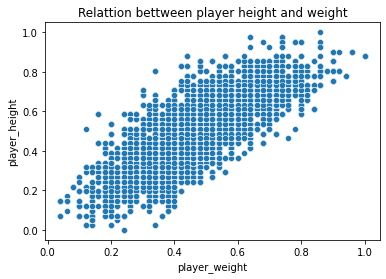

In [13]:
sns.scatterplot(x='player_weight',y='player_height',data=df)
plt.title("Relattion bettween player height and weight")
plt.show()

**Insight:**             
* the relation between height and weight is directly proportional to each other.which means if height increases,weight also increases             
<!--  -->            

**We can also observ the same through correlation matrix below**

In [14]:
player_physics={'height':df.player_height,'weight':df.player_weight}
hei_wei_df=pd.DataFrame(player_physics,columns=['height','weight'])
hei_wei_df.head()

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
h_w_standard=sc.fit_transform(hei_wei_df[['height','weight']])
h_w_standard_df=pd.DataFrame(h_w_standard,columns=['height','weight'])
h_w_standard_df.corr()

,height,weight
height,1.000000,0.782351
weight,0.782351,1.000000


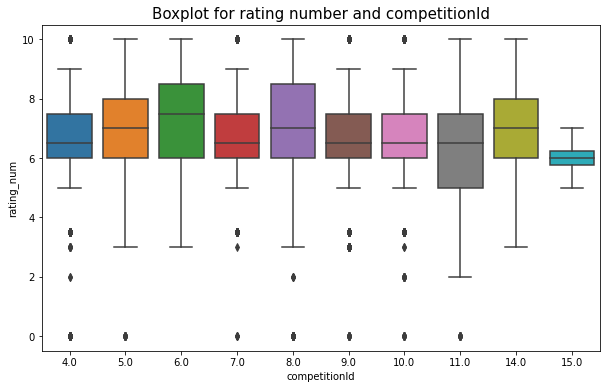

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['competitionId'],y=df['rating_num'])
plt.title("Boxplot for rating number and competitionId",fontsize=15)
plt.show()

# Data Cleaning

In [16]:
df.shape

(29227, 801)

In [17]:
# drop columns having more than 70% NaN values
df.drop(columns=['team1_other_raw_var_50','team1_other_raw_var_72','team1_other_raw_var_43','team1_other_raw_var_92',
'team1_other_raw_var_38','team2_other_raw_var_51','team1_other_ratio_var_33','team1_other_ratio_var_32',
'team2_other_raw_var_50','team1_other_raw_var_31','team1_other_raw_var_51','team2_other_raw_var_82','team2_other_raw_var_92',
'team1_other_raw_var_82','team2_other_raw_var_72','team2_other_ratio_var_33','team2_other_raw_var_43','team2_other_raw_var_40',
'team2_other_raw_var_38','team2_other_raw_var_33','team2_other_raw_var_31','team2_other_ratio_var_32','team1_other_raw_var_33',
'team1_other_raw_var_19','team2_other_raw_var_19','team1_other_raw_var_40','player_other_ratio_var_26','player_other_ratio_var_27',
'player_other_ratio_var_24','player_other_ratio_var_28','player_other_ratio_var_25','player_other_ratio_var_23',
'player_positional_ratio_var_79','player_other_ratio_var_37','player_defensive_ratio_var_38','player_defensive_ratio_var_39',
'player_offensive_ratio_var_70','player_offensive_ratio_var_68','player_offensive_ratio_var_69','player_other_ratio_var_67',
'player_other_ratio_var_73','player_offensive_ratio_var_77','player_other_ratio_var_36','player_other_ratio_var_14',
'player_defensive_ratio_var_16','player_other_ratio_var_32','player_other_ratio_var_33',
'player_other_ratio_var_34','player_offensive_ratio_var_72','player_positional_ratio_var_22','player_offensive_ratio_var_78',
'player_offensive_ratio_var_13','player_offensive_ratio_var_40','player_other_ratio_var_66'],axis=1,inplace=True)

In [18]:
# Handling NaN values with median
df=df.fillna(df.median())

In [19]:
df['team'].fillna(df['team'].mode()[0],inplace=True)

In [20]:
df.isna().sum().sort_values(ascending=False)

row_id                           0
team1_other_raw_var_73           0
team1_other_raw_var_63           0
team1_other_raw_var_64           0
team1_other_raw_var_65           0
                                ..
player_offensive_ratio_var_54    0
player_other_ratio_var_55        0
player_other_ratio_var_56        0
player_offensive_ratio_var_57    0
test_data                        0
Length: 747, dtype: int64

# Feature Selection

In [21]:
# separate dataset into train and test
X_train=df[df['test_data']==0].drop('rating_num',axis=1)
y_train=df[df['test_data']==0]['rating_num']
X_test=df[df['test_data']==1].drop('rating_num',axis=1)

# drop "test_data" column
X_train.drop('test_data',axis=1,inplace=True)
X_test.drop(['test_data'],axis=1,inplace=True)

#### Drop Duplicate and Constant Features

In [22]:
pipe=Pipeline([('constant',DropConstantFeatures(tol=1.0)),
               ('duplicate',DropDuplicateFeatures())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=1.0)),
                ('duplicate', DropDuplicateFeatures())])

In [23]:
# How many constant features are in the dataset
len(pipe.named_steps['constant'].features_to_drop_)

1

In [24]:
# check which feature is constant
pipe.named_steps['constant'].features_to_drop_[0]

'player_other_ratio_var_7'

In [25]:
# How many duplicate features are in the dataset
len(pipe.named_steps['duplicate'].features_to_drop_)

67

Let's go head and remove from the dataset

In [26]:
print("Number of original variables: {}".format(X_train.shape[1]))
X_train=pipe.transform(X_train)
X_test=pipe.transform(X_test)
print("Number of varaibles after selection: {}".format(X_train.shape[1]))

Number of original variables: 745
Number of varaibles after selection: 677


#### Drop Quasi constant features         
<!--  -->       
Quasi constant features are those that show the same values for the majority of the observation

In [27]:
# Let's find the feature with same value of 98%
sel_=DropConstantFeatures(tol=0.98)
sel_.fit(X_train)

DropConstantFeatures(tol=0.98)

In [28]:
# How many quasi-constant features are there in the dataset?
len(sel_.features_to_drop_)

39

In [29]:
# Let's look at 1 feature
sel_.features_to_drop_[1]

'player_general_var_3'

In [30]:
quasi_=list(sel_.features_to_drop_)

In [31]:
X_train.player_general_var_3.value_counts(normalize=True)

0.000000    0.993106
0.881188    0.000293
0.425743    0.000244
0.841584    0.000244
0.653465    0.000196
              ...   
0.801980    0.000049
0.960396    0.000049
0.980198    0.000049
0.326733    0.000049
0.693069    0.000049
Name: player_general_var_3, Length: 61, dtype: float64

* **To determine if this features are usefull or not,we will**               
   * compare the distribution with target variable               

<!--  -->        
To measure these diatribution we use chi_squared

In [32]:
# Let's evaluate the distribution of features
temp_y_train=y_train.astype(int)
chi_=chi2(X_train[quasi_],temp_y_train)

In [33]:
# joint feature names and p_values in a dataframe
feat=pd.concat([pd.Series(quasi_),pd.Series(chi_[1])],axis=1)
feat.columns=['feature','p_value']
feat.head()

,feature,p_value
0,player_general_var_1,0.007985
1,player_general_var_3,0.167123
2,player_other_raw_var_10,0.000552
3,player_other_raw_var_13,0.353915
4,player_other_raw_var_14,0.583232


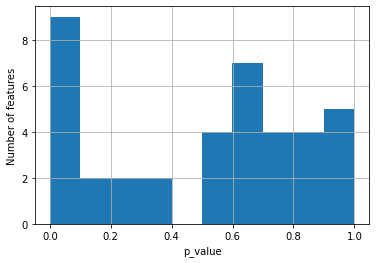

In [34]:
feat['p_value'].hist()
plt.ylabel('Number of features')
plt.xlabel('p_value')
plt.show()

I will keep the features with a p_value less than 0.5.

In [35]:
print('Number of Total quasi-cinstant features:',len(feat))
feat=feat[feat['p_value']<0.5]
print("Number of quasi_constant After removing features :",len(feat))

Number of Total quasi-cinstant features: 39
Number of quasi_constant After removing features : 15


In [36]:
# lets drop the features
X_train.drop(labels=feat['feature'],axis=1,inplace=True)
X_test.drop(labels=feat['feature'],axis=1,inplace=True)
X_train.shape

(20453, 662)

## variable exploration

In [37]:
for max_unique in [2,10,20]:
    vars_=[x for x in X_train.columns if X_train[x].nunique()<=max_unique]
    vars_=len(vars_)
    print(f'{vars_} with less than or equals to {max_unique} values')

8 with less than or equals to 2 values
155 with less than or equals to 10 values
216 with less than or equals to 20 values


we reduced the features size from 800 to 662

# Feature Engineering

In [38]:
X_train['team_1']=X_train['team'].apply(lambda x:1 if x=='team1' else 0)
X_train['team_2']=X_train['team'].apply(lambda x:1 if x=='team2' else 0)
X_test['team_1']=X_test['team'].apply(lambda x:1 if x=='team1' else 0)
X_test['team_2']=X_test['team'].apply(lambda x:1 if x=='team2' else 0)

X_train.drop('team',axis=1,inplace=True)
X_test.drop('team',axis=1,inplace=True)

# Ordinal encoding
X_train=pd.get_dummies(columns=['winner'],data=X_train,drop_first=True)
X_test=pd.get_dummies(columns=['winner'],data=X_test,drop_first=True)

In [39]:
X_train.head()

,row_id,scout_id,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_2,player_general_var_4,...,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19,team_1,team_2,winner_loser,winner_winner
0,1,13,8.0,7.0,7.0,0.317073,0.48,0.0,0.0,0.114754,...,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925,1,0,0,1
1,3,16,8.0,3.0,9.0,0.463415,0.42,0.0,0.0,0.081967,...,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392,0,1,1,0
2,4,4,5.0,11.0,11.0,0.682927,0.44,0.0,0.0,0.065574,...,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500,1,0,1,0
3,5,13,4.0,17.0,17.0,0.682927,0.58,0.0,0.0,0.000000,...,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558,0,1,1,0
4,7,11,5.0,10.0,10.0,0.731707,0.70,0.0,0.0,0.262295,...,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500,1,0,0,0


# Modelling start

In [61]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold
import xgboost as xgb

In [67]:
def rmsle_cv(model):
    kf=KFold(n_splits=10,shuffle=True,random_state=42).get_n_splits(y_train.values)
    r2=cross_val_score(model,X_train.values,y_train.values,scoring='neg_root_mean_squared_error',cv=kf,)
    return(r2)

model_xgb=xgb.XGBRegressor()
model_dt=DecisionTreeRegressor()
model_lgb=LGBMRegressor()
model_rf=LinearRegression()

In [42]:
score=rmsle_cv(model_xgb)
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
print("XGB score: {:.4f} ({:.4f})".format(score.mean(),score.std()))
print("R2 score :{:.4f}".format(r2_score(xgb.predict(X_train),y_train)))

XGB score: -1.5996 (0.1311)
R2 score :0.6342


In [43]:
score=rmsle_cv(model_lgb)
lgb=LGBMRegressor()
lgb.fit(X_train,y_train)
print("LGB score: {:.4f} ({:.4f})".format(score.mean(),score.std()))

LGB score: -1.5740 (0.1610)


In [44]:
score=rmsle_cv(model_dt)
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
print("Decision tree score: {:.4f} ({:.4f})".format(score.mean(),score.std()))
print("R2 score :{:.4f}".format(r2_score(dt.predict(X_train),y_train)))

Decision tree score: -2.3492 (0.1358)
R2 score :1.0000


**Note:** Since the **LGBM algorithm** performed well among all other algorithms

In [51]:
# Prediction
lgb=LGBMRegressor()
lgb.fit(X_train,y_train)
test_pred=lgb.predict(X_test)

## Feature importance

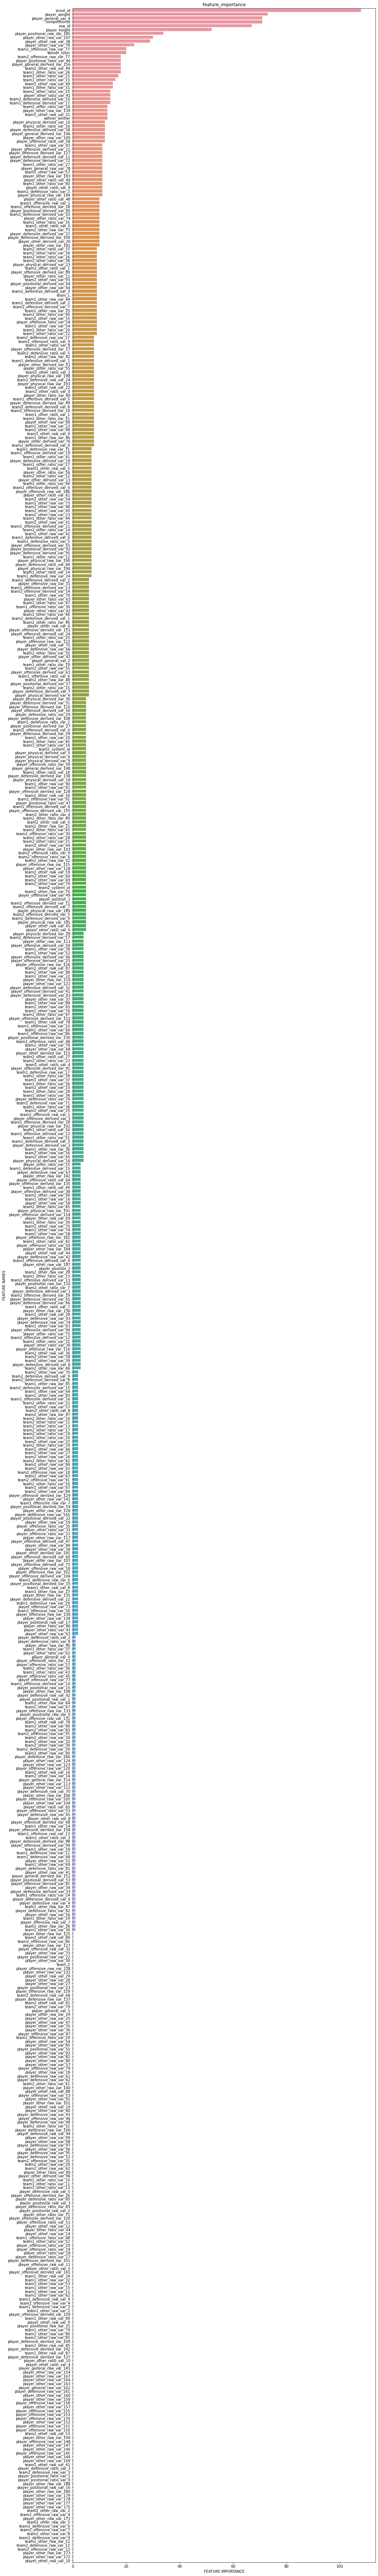

In [52]:
def plot_feature_importance(importance,names,model_type):
    
    #create arrays from features importnace and feature names
    feature_importance=np.array(importance)
    feature_names=np.array(names)
    
    # create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df=pd.DataFrame(data)
    
    # sort the dataframe in order decreasing feature importance
    fi_df.sort_values(by='feature_importance',ascending=False,inplace=True)
    
    # Define size of bar plot
    plt.figure(figsize=[15,130])
    sns.barplot(x=fi_df['feature_importance'],y=fi_df['feature_names'])
    plt.title(model_type+'Feature_importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(lgb.feature_importances_,X_train.columns,'')

# Submission

In [53]:
sub=pd.read_csv('sample_submission_wBWLI0s.csv')
sub.head()

,row_id,rating_num
0,14785,7
1,15125,7
2,13095,7
3,6079,7
4,16584,7


In [54]:
sub['rating_num']=test_pred

In [55]:
sub.to_csv('submission.csv',index=False)

In [56]:
sub

,row_id,rating_num
0,14785,6.871987
1,15125,5.765494
2,13095,5.951008
3,6079,6.292898
4,16584,6.951472
...,...,...
8769,21259,5.386832
8770,9371,8.281278
8771,23226,6.555214
8772,26623,6.035789
